In [599]:
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [600]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device =" , device)

Using device = mps


In [601]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [602]:
df.shape

(569, 33)

In [603]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [604]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [605]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [606]:
X.shape

(569, 30)

In [607]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [608]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [609]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [610]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
351,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,17.36,24.17,119.40,915.3,0.1550,0.50460,0.68720,0.21350,0.4245,0.10500
532,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,15.85,20.20,101.60,773.4,0.1264,0.15640,0.12060,0.08704,0.2806,0.07782
206,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,0.06285,...,10.42,23.22,67.08,331.6,0.1415,0.12470,0.06213,0.05588,0.2989,0.07380
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.1531,0.11200,0.09823,0.06548,0.2851,0.08763
213,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.17930,0.28030,0.10990,0.1603,0.06818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.1312,0.27760,0.18900,0.07283,0.3184,0.08183
409,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,0.05597,...,14.10,28.88,89.00,610.2,0.1240,0.17950,0.13770,0.09532,0.3455,0.06896
265,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,32.49,47.16,214.00,3432.0,0.1401,0.26440,0.34420,0.16590,0.2868,0.08218


In [611]:
y_train

351    M
532    B
206    B
348    B
213    M
      ..
278    B
20     B
409    B
265    M
96     B
Name: diagnosis, Length: 455, dtype: object

In [612]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [613]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [614]:
y_train

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [615]:
X_train

array([[ 0.45285312,  0.01063135,  0.60977385, ...,  1.46032367,
         2.03870941,  1.08433156],
       [-0.12720431, -0.68418456, -0.1758581 , ..., -0.45230098,
        -0.18840568, -0.37238037],
       [-1.19316494, -0.45818907, -1.18491175, ..., -0.92357557,
         0.09482021, -0.58783225],
       ...,
       [-0.5223159 , -0.3019156 , -0.555675  , ..., -0.3270714 ,
         0.81604025, -0.84723202],
       [ 1.84835363,  2.87163806,  1.7715667 , ...,  0.74040486,
        -0.09244937, -0.1387062 ],
       [-0.54753579, -0.32114926, -0.58086071, ..., -0.87910999,
        -1.08451384, -0.58997605]])

In [616]:
# X_train_tensor = torch.from_numpy(X_train)
# X_test_tensor = torch.from_numpy(X_test)
# y_train_tensor = torch.from_numpy(y_train)
# y_test_tensor = torch.from_numpy(y_test)

X_train_tensor = torch.from_numpy(X_train).float()  # converts to float32
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).float().view(-1,1)  # make column vector
y_test_tensor = torch.from_numpy(y_test).float().view(-1,1)

In [617]:
print(X_train_tensor.shape)  # should be (n_samples, n_features)
print(y_train_tensor.shape)  # should be (n_samples, 1)
print(y_train_tensor.dtype)  # should be torch.float32

torch.Size([455, 30])
torch.Size([455, 1])
torch.float32


In [618]:
# class SimpleModel():
#     def __init__(self, input):
#         self.weights = torch.rand(input.shape[1], 1, dtype=torch.float64, requires_grad=True )
#         self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)


#     def forward(self, inputs):
#         z = torch.matmul(inputs, self.weights) + self.bias
#         y_pred = torch.sigmoid(z)
#         return y_pred
    

#     def loss_function(self, y_pred, y):
#         epilson = 1e-7
#         y_pred = torch.clamp(y_pred, epilson, 1 - epilson)

#         loss = - (y_train_tensor * torch.log(y_pred) + (1-y_train_tensor) * torch.log(1 - y_pred)).mean()
#         return loss

In [619]:
# learning_rate = 0.1
# epochs = 50
# model = SimpleModel(X_train_tensor)

# for epoch in range(epochs):
#     y_pred = model.forward(X_train_tensor)
#     loss = model.loss_function(y_pred, y_train_tensor)

#     loss.backward()

#     with torch.no_grad():
#         model.weights -= learning_rate*model.weights.grad
#         model.bias -=learning_rate*model.bias.grad

#     model.weights.grad.zero_()
#     model.bias.grad.zero_()

#     print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

In [620]:
class Linear:
    def __init__(self, in_features, out_features):
        self.weights = torch.rand(in_features, out_features, dtype=torch.float32) * 0.01
        self.weights.requires_grad_()  # make sure weights require grad
        self.bias = torch.zeros( out_features, dtype=torch.float32, requires_grad=True)

    def forward(self, X):
        return (torch.matmul(X, self.weights)+self.bias)


In [621]:
class SimpleANN():
    def __init__(self, input):
        self.linear1 = Linear(input.shape[1], 16)
        self.linear2 = Linear(16,8)
        self.linear3 = Linear(8,1)

    def forward(self, X):
        z1 = self.linear1.forward(X)
        a1 = torch.relu(z1)

        z2 = self.linear2.forward(a1)
        a2 = torch.relu(z2)

        z3 = self.linear3.forward(a2)
        y_pred = torch.sigmoid(z3)
        return y_pred
    
    def loss_function(self, y_pred, y):
        epsilon = 1e-7
        y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
        loss = -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
        return loss


In [622]:
# Training Loop
model = SimpleANN(X_train_tensor)
learning_rate = 0.1
epochs = 100

for epoch in range(epochs):
    y_pred = model.forward(X_train_tensor)
    loss = model.loss_function(y_pred, y_train_tensor)
    loss.backward()

    with torch.no_grad():
        model.linear1.weights -=learning_rate*model.linear1.weights.grad
        model.linear1.bias -=learning_rate*model.linear1.bias.grad
        model.linear1.weights.grad.zero_()
        model.linear1.bias.grad.zero_()

        model.linear2.weights -=learning_rate*model.linear2.weights.grad
        model.linear2.bias -=learning_rate*model.linear2.bias.grad
        model.linear2.weights.grad.zero_()
        model.linear2.bias.grad.zero_()

        model.linear3.weights -=learning_rate*model.linear3.weights.grad
        model.linear3.bias -=learning_rate*model.linear3.bias.grad
        model.linear3.weights.grad.zero_()
        model.linear3.bias.grad.zero_()

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')



Epoch 1, Loss: 0.6931
Epoch 2, Loss: 0.6915
Epoch 3, Loss: 0.6899
Epoch 4, Loss: 0.6884
Epoch 5, Loss: 0.6870
Epoch 6, Loss: 0.6857
Epoch 7, Loss: 0.6844
Epoch 8, Loss: 0.6832
Epoch 9, Loss: 0.6821
Epoch 10, Loss: 0.6810
Epoch 11, Loss: 0.6799
Epoch 12, Loss: 0.6790
Epoch 13, Loss: 0.6780
Epoch 14, Loss: 0.6771
Epoch 15, Loss: 0.6763
Epoch 16, Loss: 0.6755
Epoch 17, Loss: 0.6747
Epoch 18, Loss: 0.6740
Epoch 19, Loss: 0.6733
Epoch 20, Loss: 0.6726
Epoch 21, Loss: 0.6720
Epoch 22, Loss: 0.6714
Epoch 23, Loss: 0.6708
Epoch 24, Loss: 0.6703
Epoch 25, Loss: 0.6698
Epoch 26, Loss: 0.6693
Epoch 27, Loss: 0.6688
Epoch 28, Loss: 0.6684
Epoch 29, Loss: 0.6679
Epoch 30, Loss: 0.6675
Epoch 31, Loss: 0.6672
Epoch 32, Loss: 0.6668
Epoch 33, Loss: 0.6664
Epoch 34, Loss: 0.6661
Epoch 35, Loss: 0.6658
Epoch 36, Loss: 0.6655
Epoch 37, Loss: 0.6652
Epoch 38, Loss: 0.6649
Epoch 39, Loss: 0.6647
Epoch 40, Loss: 0.6644
Epoch 41, Loss: 0.6642
Epoch 42, Loss: 0.6640
Epoch 43, Loss: 0.6638
Epoch 44, Loss: 0.66

In [623]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.9).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.6228070259094238


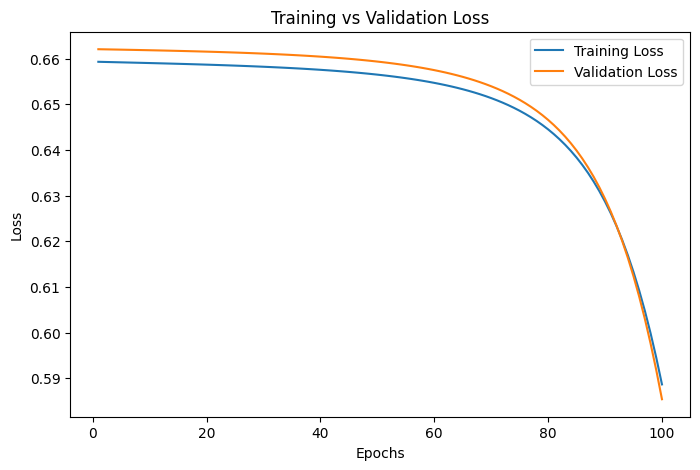

In [624]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []

epochs = 100
learning_rate = 0.1

for epoch in range(epochs):
    # -------- Training --------
    y_pred_train = model.forward(X_train_tensor)
    loss_train = model.loss_function(y_pred_train, y_train_tensor)
    loss_train.backward()

    # update weights
    with torch.no_grad():
        for layer in [model.linear1, model.linear2, model.linear3]:
            layer.weights -= learning_rate * layer.weights.grad
            layer.bias -= learning_rate * layer.bias.grad
            layer.weights.grad.zero_()
            layer.bias.grad.zero_()
    
    # store training loss
    train_losses.append(loss_train.item())

    # -------- Validation --------
    with torch.no_grad():
        y_pred_val = model.forward(X_test_tensor)
        loss_val = model.loss_function(y_pred_val, y_test_tensor)
        val_losses.append(loss_val.item())

    #print(f"Epoch {epoch+1}: Train Loss={loss_train.item():.4f}, Val Loss={loss_val.item():.4f}")

# -------- Plotting --------
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


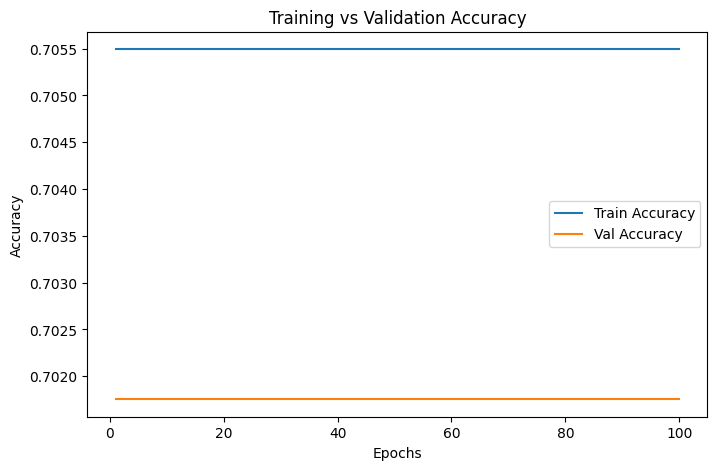

In [626]:
train_acc = []
val_acc = []

for epoch in range(epochs):
    # training predictions
    y_pred_train = model.forward(X_train_tensor)
    y_pred_train_bin = (y_pred_train > 0.5).float()
    acc_train = (y_pred_train_bin == y_train_tensor).float().mean()
    train_acc.append(acc_train.item())

    # validation predictions
    y_pred_val = model.forward(X_test_tensor)
    y_pred_val_bin = (y_pred_val > 0.5).float()
    acc_val = (y_pred_val_bin == y_test_tensor).float().mean()
    val_acc.append(acc_val.item())

# plot accuracy
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_acc, label="Train Accuracy")
plt.plot(range(1, epochs+1), val_acc, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()
